In [29]:
# Import the relevant modules to be used
import gzip
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import struct

# Config matplotlib for inline plotting
%matplotlib inline

In [18]:
def load_images(path, number_of_samples):    
    try:
        with gzip.open(path) as gz:
            n = struct.unpack('I', gz.read(4))
            # Read magic number.
            if n[0] != 0x3080000:
                raise Exception('Invalid file: unexpected magic number.')
            # Read number of entries.
            n = struct.unpack('>I', gz.read(4))[0]
            if n != number_of_samples:
                raise Exception('Invalid file: expected {0} entries.'.format(number_of_samples))
            crow = struct.unpack('>I', gz.read(4))[0]
            ccol = struct.unpack('>I', gz.read(4))[0]
            if crow != 28 or ccol != 28:
                raise Exception('Invalid file: expected 28 rows/cols per image.')
            # Read data.
            res = np.frombuffer(gz.read(number_of_samples * crow * ccol), dtype = np.uint8)
    finally:
        return res.reshape((number_of_samples, crow * ccol))

def load_labels(path, number_of_samples):    
    try:
        with gzip.open(path) as gz:
            n = struct.unpack('I', gz.read(4))
            # Read magic number.
            if n[0] != 0x1080000:
                raise Exception('Invalid file: unexpected magic number.')
            # Read number of entries.
            n = struct.unpack('>I', gz.read(4))
            if n[0] != number_of_samples:
                raise Exception('Invalid file: expected {0} rows.'.format(number_of_samples))
            # Read labels.
            res = np.frombuffer(gz.read(number_of_samples), dtype = np.uint8)
    finally:
        return res.reshape((number_of_samples, 1))

def load_dataset(images_data_path, labels_data_path, number_of_samples):
    images = load_images(images_data_path, number_of_samples)
    labels = load_labels(labels_data_path, number_of_samples)
    return np.hstack((images, labels))

In [22]:
training_dataset = load_dataset("data/training_images_idx3_ubyte.gz", "data/training_labels_idx1_ubyte.gz", 60000)
print("Loaded training data")

test_dataset  = load_dataset("data/test_images_idx3_ubyte.gz", "data/test_labels_idx1_ubyte.gz", 10000)
print("Loaded test data")

Loaded training data
Loaded test data


Image Label:  9


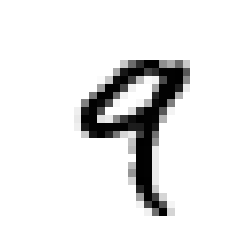

In [27]:
# Plot a random image
sample_number = 4
plt.imshow(training_dataset[sample_number,:-1].reshape(28,28), cmap="gray_r")
plt.axis('off')
print("Image Label: ", training_dataset[sample_number,-1])